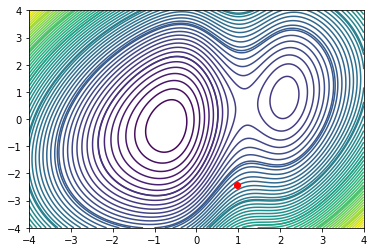

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

def f2(x): #complex function with 2 minimum
    return x[0]**2/2 + x[1]**2/3 - x[0]*x[1]/4 + 3* np.exp(-(x[0]-1)**2)

def init(x_min, x_max, y_min, y_max):
    x0 = x_min+np.random.random()*(x_max-x_min)
    y0 = y_min+np.random.random()*(y_max-y_min)
    return [x0, y0]

x_min, x_max = -4, 42
y_min, y_max = -4, 4                   

nx = np.linspace(x_min,x_max,400)
ny = np.linspace(y_min,y_max,400)

x,y = np.meshgrid(nx,ny)
z = f2([x, y])
fig = plt.figure()
levels = np.arange(np.min(z), np.max(z), 0.3)
plt.contour(x,y,z, levels=levels)
plt.contour(x,y,z)


x0, y0 = init(x_min, x_max, y_min, y_max)
plt.plot(x0, y0, 'ro')
plt.show()

In [39]:
# Grid search
def grid_search(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
    
    x_range = np.linspace(x_min, x_max, N)
    y_range = np.linspace(y_min, y_max, N)
            
    for _x in range(x_min, x_max, N):
        for _y in range(y_min, y_max, N):
            if f2([i, j]) < minf:
                minf = f2([i, j])
    return minf

In [38]:
grid_search(1)

0.5549469166662025

In [10]:
# Random search
def random_search(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
    
    for i in range(N):
        [x0, y0] = init(x_min, x_max, y_min, y_max)
        if f2([x0, y0]) < minf:
            minf = f2([x0, y0])
    return minf

In [33]:
random_search(10000)

0.38976281995005235

In [47]:
# Mixed Random search
from scipy.optimize import minimize

def random_search2(N):
    x_min, x_max = -4, 4
    y_min, y_max = -4, 4                   
    minf = f2([x_min,y_min])
    
    for i in range(N):
        [x0, y0] = init(x_min, x_max, y_min, y_max)
        res = minimize(f2, [x0, y0])
        if res.fun < minf:
            minf = res.fun
    return minf

In [59]:
random_search2(1)

2.892263071707504

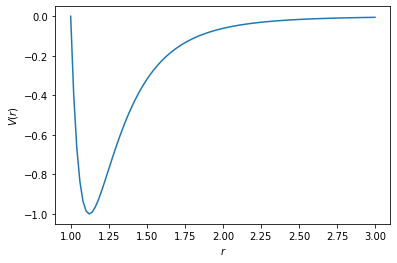

minimum value:    -0.999955009866677


In [18]:
import numpy as np
import matplotlib.pyplot as plt

def LJ(r):
    r6 = r**6
    r12 = r6*r6
    return 4*(1/r12 - 1/r6)

r = np.linspace(1.0,3.0,100)
plt.xlabel('$r$')
plt.ylabel('$V(r)$')
plt.plot(r, LJ(r))
plt.show()

print('minimum value:   ', min(LJ(r)))

In [125]:
def init_r(L=4):
    return L*np.random.random_sample()

In [127]:
from scipy.optimize import minimize

pos = init_r()
minimize(LJ, pos, method='CG', tol=1e-4).fun

-0.9999999999943139

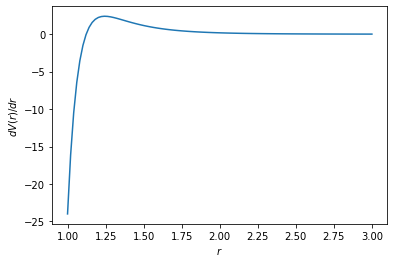

In [128]:
def dLJ(r):
    r7 = r**7
    r13 = r**13
    return 24*(1/r7 - 2/r13)

r = np.linspace(1.0,3.0,100)
plt.xlabel('$r$')
plt.ylabel('$dV(r)/dr$')
plt.plot(r, dLJ(r))
plt.show()

In [137]:
f_values = []
pos_values = []
N_runs = 50

for i in range(N_runs):
    pos = init_r()
    res = minimize(LJ, pos, jac=dLJ, method='CG', tol=1e-4)
    f_values.append(res.fun)
    pos_values.append(res.x)
    #print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_runs, res.fun), flush=True, end='')
print('\nGround state energy:', min(f_values))    


Ground state energy: -1.0000000000000002


In [138]:
def total_LJ_V(positions):
    E = 0
    N_atom = int(len(positions)/3)

    for i in range(N_atom - 1):
        for j in range(i + 1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1 - pos2)
            E += LJ(dist)
            
    return E

def init_pos(N, L=1):
    return L*np.random.random_sample((N*3,))

In [156]:
N = 2
f_values = []
pos_values = []
N_runs = 100

for i in range(N_runs):
    pos = init_pos(N)
    res = minimize(total_LJ_V, pos, jac=dLJ, method='CG', tol=1e-4)
    f_values.append(res.fun)
    pos_values.append(res.x)
    print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_runs, res.fun), flush=True, end='')
print('\nGround state energy:', min(f_values))    

RUN 99 OUT OF 100: Total Energy = 1496.8915684791
Ground state energy: -0.9919125125145869


In [159]:
N = 3
f_values = []
pos_values = []
N_runs = 100

for i in range(N_runs):
    pos = init_pos(N)
    res = minimize(total_LJ_V, pos, jac=dLJ, method='CG', tol=1e-4)
    f_values.append(res.fun)
    pos_values.append(res.x)
    print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_runs, res.fun), flush=True, end='')
print('\nGround state energy:', min(f_values))    

RUN 99 OUT OF 100: Total Energy = 36.8182316442985867
Ground state energy: -0.003825319538448788


In [178]:
def jac_LJ_V(positions):
    N_atom = int(len(positions)/3)
    #jac_size = (N_atom*(N_atom-1))/2
    #J = np.zeros(int(jac_size))
    J = []

    for i in range(N_atom - 1):
        for j in range(i + 1, N_atom):
            pos1 = positions[i*3:(i+1)*3]
            pos2 = positions[j*3:(j+1)*3]
            dist = np.linalg.norm(pos1 - pos2)
            #J[i+j] = dLJ(dist)
            J.append(dLJ(dist))
            
    return np.asarray(J)

In [180]:
N = 2
f_values = []
pos_values = []
N_runs = 100

for i in range(N_runs):
    pos = init_pos(N)
    res = minimize(total_LJ_V, pos, jac=jac_LJ_V, method='CG', tol=1e-4)
    f_values.append(res.fun)
    pos_values.append(res.x)
    print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_runs, res.fun), flush=True, end='')
print('\nGround state energy:', min(f_values))    

RUN 99 OUT OF 100: Total Energy = 214.050585.19425
Ground state energy: -0.9968437282043222


In [187]:
N = 3
f_values = []
pos_values = []
N_runs = 1000

for i in range(N_runs):
    pos = init_pos(N)
    res = minimize(total_LJ_V, pos, jac=dLJ, method='CG', tol=1e-4)
    f_values.append(res.fun)
    pos_values.append(res.x)
    print('\rRUN {:d} OUT OF {:d}: Total Energy = {:.4f}'.format(i, N_runs, res.fun), flush=True, end='')
print('\nGround state energy:', min(f_values))    

RUN 999 OUT OF 1000: Total Energy = 23663.65756702755.0000
Ground state energy: -0.802068132836201


In [ ]:
def LJ_force(pos, dim, mu=0.1, shift=False):
    N_atom = int(len(pos)/dim)
    pos = np.reshape(pos,[N_atom, dim])
    force = np.zeros([N_atom, dim])
    for i, pos0 in enumerate(pos):
        pos1 = pos.copy()
        pos1 = np.delete(pos1, i, 0)
        distance = cdist([pos0], pos1)
        r = pos1 - pos0
        r2 = np.power(distance, 2)
        r6 = np.power(r2, 3)
        r12 = np.power(r6, 2)
        force[i] = np.dot((48/r12-24/r6)/r2, r)
        # force from the punish function mu*sum([x-mean(x)]^2)
        if dim > 3:
            for j in range(3,dim):
                if shift:
                    force[i, j] += mu*(pos[i, j] - np.mean(pos[:, j]))
                else:
                    force[i, j] += mu*pos[i, j] 
    return force.flatten()